# 事前環境設定

・分析に利用するライブラリをインストールする

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

・分析利用データを読込

In [2]:
df_train=pd.read_csv('./train.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

今回はSalePriceに影響が強いと思われる築年、面積、管理状態の評価（物件全体と地下室）の４変数で予測
　目的変数：SalePrice <br>
　説明変数：YearBuilt、GrLivArea、OverallCond、BsmtQual

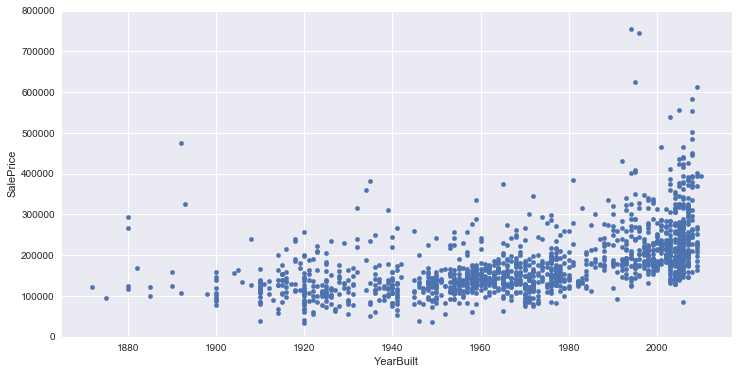

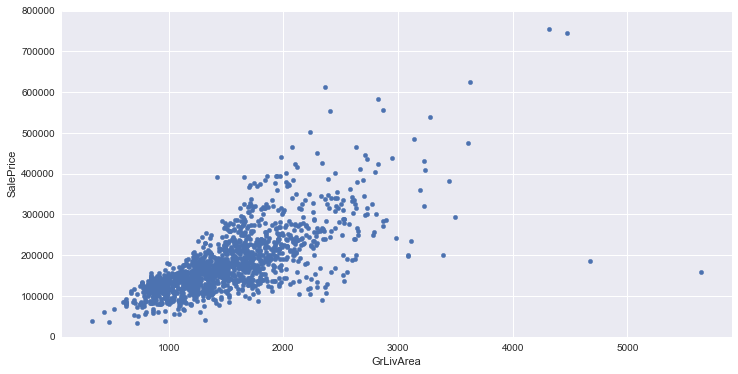

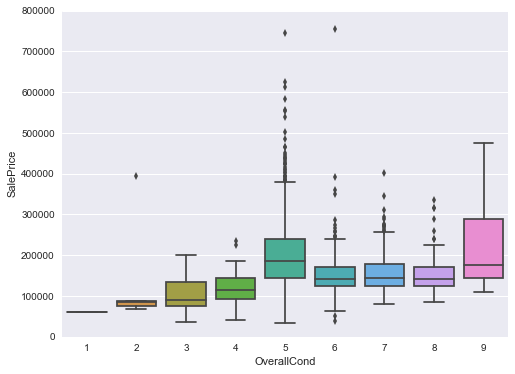

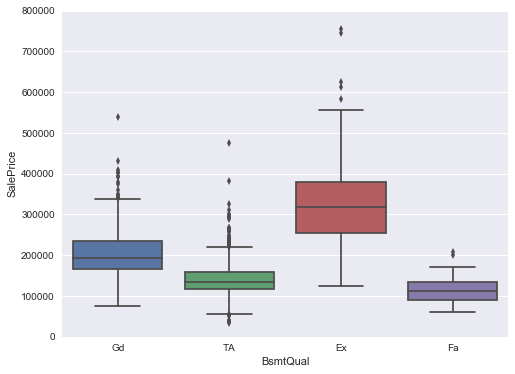

In [4]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000),figsize=(12,6))

var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000),figsize=(12,6))

var = 'OverallCond'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

var = 'BsmtQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

# データクレンジング・加工

#### 外れ値の削除

In [5]:
df_train.drop(df_train[df_train['GrLivArea']>=4000].index,inplace=True)

#### 使うカラムによってデータセットを縮小

In [6]:
df_train['SalePrice'].describe()

count      1456.000000
mean     180151.233516
std       76696.592530
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      625000.000000
Name: SalePrice, dtype: float64

In [7]:
df_y=df_train['SalePrice']
df_y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [8]:
df_train_shrinked=df_train.loc[:,['GrLivArea','YearBuilt','OverallCond','BsmtQual']]
df_x=df_train_shrinked

In [9]:
df_x.head()

,GrLivArea,YearBuilt,OverallCond,BsmtQual
0,1710,2003,5,Gd
1,1262,1976,8,Gd
2,1786,2001,5,Gd
3,1717,1915,5,TA
4,2198,2000,5,Gd


#### 欠損値補完

In [10]:
#欠損値のあるカラムを探し出す

for i in df_x.columns:
    if sum(df_x[i].isnull())>0:
        print(i)

BsmtQual


In [11]:
#欠損値　-> 'NA'　に変換
df_x.loc[df_x['BsmtQual'].isnull()==True,'BsmtQual']='NA'

In [13]:
df_x['BsmtQual'].value_counts()


count     1456
unique       5
top         TA
freq       649
Name: BsmtQual, dtype: object

#### ダミー変数変換　※カテゴリカルデータをモデルの説明変数として利用する際に必要なデータ加工

In [14]:
df_x=pd.get_dummies(df_x)
df_x.head()

,GrLivArea,YearBuilt,OverallCond,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA
0,1710,2003,5,0,0,1,0,0
1,1262,1976,8,0,0,1,0,0
2,1786,2001,5,0,0,1,0,0
3,1717,1915,5,0,0,0,0,1
4,2198,2000,5,0,0,1,0,0


# モデル作成/モデル評価　※今回はシンプルに線形回帰分析を選定

・モデル作成

In [15]:
clf =LinearRegression()

In [16]:
clf.fit(df_x, df_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

・モデル評価（モデルの精度指標と、説明変数の貢献度）

In [17]:
import statsmodels.api as sm
model = sm.OLS(df_y, df_x)
results = model.fit()
results.summary()

/Users/t_hashimoto/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     727.2
Date:                Wed, 01 Aug 2018   Prob (F-statistic):               0.00
Time:                        15:31:41   Log-Likelihood:                -17344.
No. Observations:                1456   AIC:                         3.470e+04
Df Residuals:                    1448   BIC:                         3.475e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
GrLivArea      86.9264      2.067     42.063      0.000      82.873      90.980
YearBuilt     860.8742     49.471     17.401      0.000     763.831     957.917
OverallCond  1.022e+04    927.730     11.019      0.000    8403.115     1.2e+04
BsmtQual_Ex -1.624e+06   1.01e+05    -16.086      0.000   -1.82e+06   -1.43e+06
BsmtQual_Fa -1.713e+06   9.72e+04    -17.621      0.000    -1.9e+06   -1.52e+06
BsmtQual_Gd -1.705e+06      1e+05    -17.003      0.000    -1.9e+06   -1.51e+06
BsmtQual_NA -1.742e+06   9.86e+04    -17.667      0.000   -1.94e+06   -1.55e+06
BsmtQual_TA -1.716e+06   9.84e+04    -17.443      0.000   -1.91e+06   -1.52e+06
==============================================================================
Omnibus:                      301.248   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1809.181
Skew:                           0.821   Prob(JB):                         0.00
Kurtosis:                       8.208   Cond. No.                     5.84e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

・モデル評価（予実の比較）

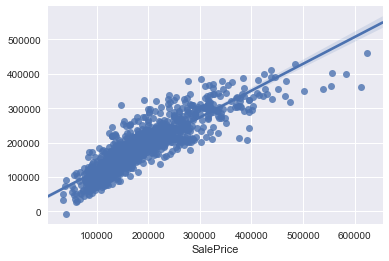

In [18]:
sns.regplot(df_y,clf.predict(df_x))

・参考．予実の誤差

In [19]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [20]:
rmse(clf.predict(df_x),df_y)

36079.872836433424

・モデル評価については以下を参照<br>
　いまさら聞けない機械学習の評価関数（Gunosyデータ分析ブログ）<br>
　http://data.gunosy.io/entry/2016/08/05/115345

# （おまけ）Submitのための前処理の統合

In [ ]:
def preprocess(train_flg):
    # train set の場合の処理
    if train_flg:
        df=pd.read_csv('./train.csv')
        df.drop(df[df['GrLivArea']>=4000].index,inplace=True)
        df_y = df['SalePrice']
    else:
        df=pd.read_csv('./test.csv')
    # 使う変数を定義
    cols = ['GrLivArea','YearBuilt','OverallCond','BsmtQual']
    df_x = df.loc[:,cols]
    #欠損値　-> 'NA'　に変換
    df_x.loc[df_x['BsmtQual'].isnull()==True,'BsmtQual']='NA'
    # dummy
    df_x=pd.get_dummies(df_x)
    # train set の場合のoutput
    if train_flg:
        return df_x,df_y
    # test set の場合のoutput、kaggleへ提出するファイルの規定により、idも一緒に出力する
    else:
        return df_x,df['Id']

In [ ]:
# train set
# 前処理の統合変数を使う
df_x,df_y = preprocess(train_flg=True)

# linear regressionで検証
clf.fit(df_x, df_y)
rmse(clf.predict(df_x),df_y)

In [ ]:
# test set
# 前処理の統合変数を使う
df_test_x,df_test_id = preprocess(train_flg=False)

y_pred = clf.predict(df_test_x)

pred_df = pd.DataFrame(y_pred, index=df_test_id, columns=["SalePrice"])
pred_df.to_csv('./output.csv', header=True, index_label='Id')